**GÖRÜNTÜLER ÜZERİNDE ÇALIŞMA**

**1-KENAR TESPİT ALGORİTMALARI**

Görüntü işlemede kenar, piksel yoğunluk(gri ya da renkli) değerlerinde ani bir değişimin meydana geldiği bir dizi bitişik pikseller bütünü olarak tanımlanabilir.

Kenar algoritmaların temelinde görüntü üzerinde meydana gelen ani piksel değişimleri veya ani parlaklı/yoğunluk değişimlerini yakalayacak bir dizi matematiksel formüllerdir.

Gerçek bir resimde kenar olmadığı halde kenar olarak algılanmasına neden olan **gölgelendirme** gibi unsurlar veya kenar olduğu halde kenar olmasını önleyebilecek **parlaklık** gibi unsurlar bulunabilmektedir. Gürültülü kaynaklı eksik kenar pikselleri de kenar olmasını önleyebilecek niteliklerden birisidir.

Kenar Tespit Algoritmalarının Çalıştırılma Adımları:

1. Filtreleme Yöntemleri(bluring) parametre verilirken çok dikkatli olunmalıdır. Kenar Tespit Algoritmaların uçurum noktasıdır.
2. Yoğunluk değişimlerinin anlamlı yakalanması için kernel üzerinden belirginleştirme, yoğunluk değişiminin anlamlı olmadığı alanlarda ise eşikleme(thresholding) kullanılır.


Kenar Tespit Algoritmalarının Matematiksel Gruplandırılması:

1. Yoğunluk değişim tespiti için:1.Türev'den alınan Sobel,Perwitt,Roberts operatörleridir.
2. Görüntünün 2.'inci Türev'den alınan Laplacian ve Second Directional Derivative operatörleridir.
3. Gürültülü görüntülerde bu ilk iki madde performansa bağlı olarak başarım sonucu düşütüğü görülecektir.Önce bir filtrelemeden geçilmesi anlaşılacak ve farklı parametre ayarlarının değiştirilmesi gerekliliğine ön görülecektir bunlara imkan sağlayan Canny ve Deriche Algoritmalarıdır.



**SOBEL OPERATÖRÜ**

Gri kodlamalı resimler üzerinde çalışan Gradyan Hesaplama olarakta tabi edilir. Kernel filtresinin anlamlı yoğunluğun olduğu alana uygulaması ile elde edilen değerler oldukça yüksek çıkarken, sabit yoğunlukta bir bölgeye uygulanması sonucunda elde edilen değerler sıfıra oldukça yakın çıkacaktır. Giriş Resmi X Yatay Kernel = Çıktı(Sonuç)

**Sobel operatörü kenar yapısını belirgin hale getirirken çoğu zaman kenar olmadığı halde kenar gibi hesaplana ufak alanların çıkmasına da ortaya çıkmasına sebep olabilmektedir.Bu durumu engellemek için kenar çalışması yapmadan önce yumuşatma işlemi yapılması genel bir durum haline gelmiştir.Bu yüzden küçük durumlarda olsa bile bir GaussianBlur() uygulamak sonuç çıktısında elde edilecek kaliteyi artırır.**

Kenarlığın olduğu alanlar işaretlenip,olmayanlara ise 0 eklenilmiştir.Eğim açısı yani(arctan=Gy/Gx) (DikeyEksen/YatayEksen) bize kenarlığın yönünü gösterebilmektedir.

In [ ]:
import cv2
Gx = cv2.Sobel(src,ddepth,dx,dy[,dst[,ksize[,scale[,delta[,borderType]]]]])
# src:sobel operatörün uygulayacağı resim girişi -- ddepth:çıkış resminin derinliğini ayarlamak -- dx:yatay eksen kullanılacak dereceyi belirlemek --dy:dikey eksen kullanılacak derece
# ksize:kullanılacak sobel kernelinin filtresinin büyüklüğü(1,3,5,7 değerleri) -- scale:sonuç değerlerini ölçüklendirme(None) -- delta:sonuçlara eklenecek sabit bir değer vermek için
# borderType:kenarlık tipi -- #return:giriş resmi ile aynı boyutlarda olan ve kenarlıkların gösterildiği resmi döndürür.

**Sobel operatörlerinde her ne kadar dx,dy ve ksize parametreleri değiştirilebilir gibi görünse de en popüler kullanım şekli:**

1. Yatay eksenlerde hesaplamalar için (dx=1,dy=0,ksize=3)
2. Dikey eksenlerde hesaplamalar için (dx=0,dy=1,ksize=3)



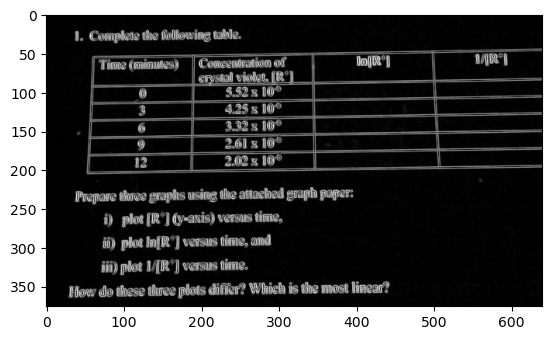

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

img = cv2.imread('OneDrive/Belgeler/OpenCV/Kitap/DATA/19_table.png',cv2.IMREAD_GRAYSCALE)

Gx = cv2.Sobel(img,cv2.CV_64F,dx=1,dy=0,ksize=3) 
Gy = cv2.Sobel(img,cv2.CV_64F,dx=0,dy=1,ksize=3)

G = np.sqrt((Gx * Gx) + (Gy * Gy))

plt.imshow(G,cmap="gray")

**Sobel operatöründe kullanılan kernel yapıları değiştirilerek farklı sonuçlar elde edilmesi mümkündü. Örneğin görüntü üzerinde çok fazla parazit/gürültü varsa kernel değerlerinin artırılması ya da sobel işleminden önce yumuşatma(blurring) işlemleri yapılması ile daha başarılı sonuçlar alınabilir.**

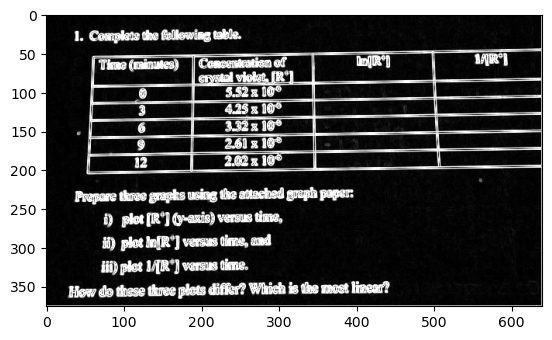

In [6]:
#SOBEL OPERATÖRÜ FORMÜLASYONUNU KENDİ YAZACAĞIMIZ:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def customSobelOperator(img):
    newImage = np.copy(img)
    size = newImage.shape
    for i in range(1,size[0]-1):
        for j in range(1,size[1]-1):
            Gx = (img[i-1][j+1]+2*img[i][j+1]+img[i+1][j+1]) - (img[i-1][j-1]+2*img[i][j-1]+img[i+1][j-1])
            Gy = (img[i+1][j-1]+2*img[i+1][j]+img[i+1][j+1]) - (img[i-1][j-1]+2*img[i-1][j]+img[i-1][j+1])
            newImage[i][j] = min(255,np.sqrt(Gx**2 + Gy**2))
    return newImage

plt.imshow(customSobelOperator(cv2.imread('OneDrive/Belgeler/OpenCV/Kitap/DATA/19_table.png',cv2.IMREAD_GRAYSCALE)),cmap="gray")

**PREWİTT OPERATÖRÜ**

Sobel operatörlerinden farkı kernel merkezli kenar çarpanları 1'dir. Sobel operatöründen daha az belirginleştirme vardır.

OpenCV'de doğrudan bir fonksiyon olmadığı için **filter2D()** ile veri türü ve kenarlık seçimleriyle birlikte sobeldeki aynı sonuç elde edilmeye çalışılacaktır.

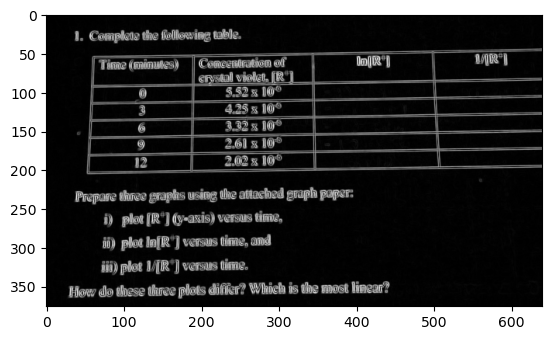

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

img = cv2.imread('OneDrive/Belgeler/OpenCV/Kitap/DATA/19_table.png',cv2.IMREAD_GRAYSCALE)

kernelX = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
kernelY = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

Gx = cv2.filter2D(img,cv2.CV_64F,kernelX)
Gy = cv2.filter2D(img,cv2.CV_64F,kernelY)

G = np.sqrt((Gx * Gx) + (Gy * Gy))

plt.imshow(G,cmap="gray")

**ROBERT CROSS OPERATÖRÜ**

Sobel ve Prewitt operatörlerinden farklı olarak yan yana pikseller arası yoğunluk yerine çarpraz pikseller arası yoğunluk değişimine odaklanmaktadır.

filter2D() fonksiyonundan veri türünü ve parametreleri ayarlanarak kullanılabilir.

**G = |Gx| + |Gy|  (Mutlak değer alınarak toplanılır.)**

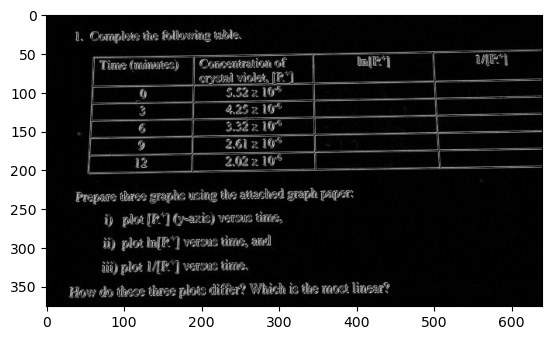

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

img = cv2.imread('OneDrive/Belgeler/OpenCV/Kitap/DATA/19_table.png',cv2.IMREAD_GRAYSCALE)

kernelX = np.array([[1,0],[0,-1]])
kernelY = np.array([[0,-1],[1,0]])

Gx = cv2.filter2D(img,cv2.CV_16S,kernelX)
Gy = cv2.filter2D(img,cv2.CV_16S,kernelY)

Gx = cv2.convertScaleAbs(Gx)
Gy = cv2.convertScaleAbs(Gy)

G = Gx + Gy
plt.imshow(Gx,cmap="gray")



**LAPLACİAN OPERATÖRÜ**

Görüntünün ikinci türevini kullanarak kenar piksellerinin olduğu noktaları yakalamaya odaklanır.
İlk türevin yüksek olduğu bir noktanın kenar olabilmesi için ikinci türevin 0 olmasıdır. Kenar piksellerini bulmada oldukça başarılıdır ancak gürültüye karşı oldukça hassastır.

Literatürde (Laplacian Of Gaussion): Önce filtreleme ardından kenar tespit.

In [3]:
import cv2
src = cv2.Laplacian(src,ddepth[,dst[,ksize[,scale[,delta[,borderType]]]]])

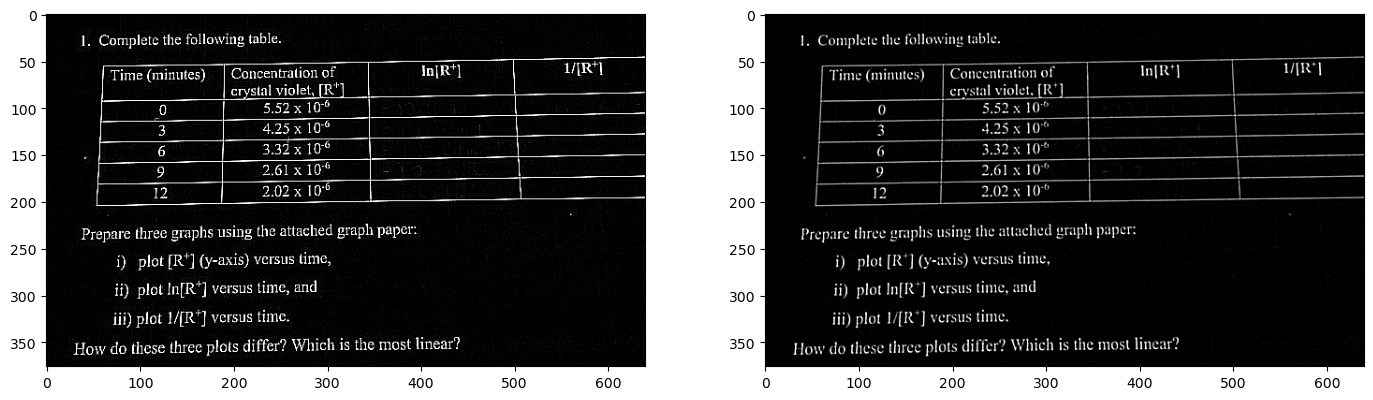

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

img = cv2.imread('OneDrive/Belgeler/OpenCV/Kitap/DATA/19_table.png',0)
result1 = cv2.Laplacian(img,ddepth=-1,ksize=3)

imgBlured = cv2.GaussianBlur(img,(3,3),0)
result2 = cv2.Laplacian(imgBlured,ddepth=-1,ksize=3)

f,eksen = plt.subplots(1,2,figsize=(17,5))
eksen[0].imshow(result1,cmap="gray")
eksen[1].imshow(result2,cmap="gray")


**CANNY KENAR ALGORİTMASI**

Resim/Video gibi araçların kenar tespitinin bulunmasındaki en zor olan medyanın ilk oluşturulmasıyla doğrudan ilgilidir.

Diğer algoritmalardan farkı giriş resimlerinin 3 kanallıdır.

Gürültünün bastırılması için çok fazla filtreleme yapılması kenar piksellerinin kaybolmasına veya kenarların keskin olması için filtreleme yapılmaması ise geliştirilen modelin gürültüye karşı çok hassas olmasına neden olur. Gürültüye karşı çok hassas olan modellerde ise aslında kenar olmayan ancak kenar gibi tespit edilebilen piksellerin bulmasıyla sonuçlanır.

Canny Kenar Algoritmaları Çalışma Parçaçıkları:
1. Gürültü Azaltma: Kernel büyüklüğü tek rakamlardan oluşmalıdır.
2. Gradyan Hesaplama: Ani yoğunluk değişimlerini tespit edip piksellerdeki sonuçla kenar pikselleri ve kenar açısı bulunur.
3. Maksimum Olmayan Bastırma: Gradyan ile tespit edilen kenarların incetilme işlemidir. Kalın kenarların tespiti çok daha zordur.
4. Çiftli Eşikleme: Kenar yapılarının bir bütünlük kazanması ve kenar olarak algılanan istenmeyen piksellerin ortadan kaldırılması için piksellerin gruplandırılmasıdır.Bu işlemde pikseller üç seviyeye ayrılır:
    
    a.Birinc seviye pikseller: Kenar oldukları belli olan pikseller.
    b.Üçüncü seviye pikseller: Kenar olmaması gerektiği halde gürültüden kaynaklı tespit edilmiş pikseller.
    c.İkinci seviye pikseller: Zayıf ancak içerisinde kenar olduğu ya olmadığı pikselleri birlikte barındıran pikseller.
    
Yani iki defa threshold değeri belirlenecektir. İlk defa yapılacak olan eşikleme işlemine LowThreshold diğerine ise HighThreshold denir.

5. Histerezis ile Kenar Tespiti: Kenar olan ve kenar olmayan pikselleri birlikte barında pikselleri ele alır.Kenar olma ihtimali olan pikseller kenar olarak algılanırken diğerleri komple kaldırılır.

"Eğer zayıf bir piksel, güçlü(1.seviye grubu pikseller) bir pikselin yanında yer alıyorsa muhtelemen kenar pikselidir,eğer yanında hiç kuvvetli piksel yoksa o zaman gürültüden kaynaklıdır ve kaldırılmalıdır."


In [ ]:
import cv2
result1 =cv2.Canny(image,threshold1,threshold2,apertureSize=3,L2gradient=False)
result2 = cv2.Canny(dx=CV_16SC1,dy=CV_16SC3,lowTH,highTH,L2gradient=True)

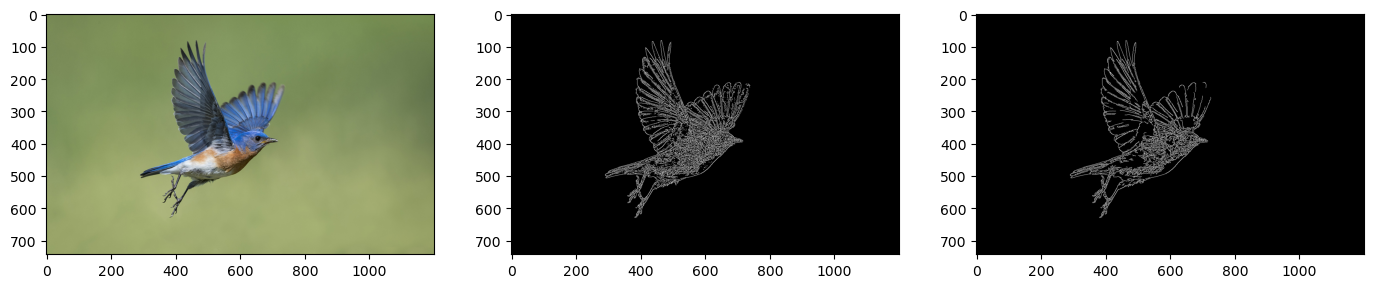

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

img = cv2.imread('OneDrive/Belgeler/OpenCV/Kitap/DATA/21_bird.jpg')
result1 = cv2.Canny(img,80,80)

medianValue = np.median(img)
lowTH = int(max(0, 0.7 * medianValue)) #Eger ortanca degeri %70i 0dan buyukse lowTH degeri ortanca degerinin %70ine esit yoksa 0'dır.
highTH = int(min(255, 1.3 * medianValue)) #Eger ortanca degeri %30 fazlasi 255den kucuk ise highTH degeri ortanca degerinin 1.3X yoksa 255

result2 = cv2.Canny(img,lowTH,highTH,L2gradient=True) # (|dI/dX| + (|dI/dY|))~FALSE   (Karekök farkı TRUE)

f,eksen = plt.subplots(1,3,figsize=(17,7))
eksen[0].imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
eksen[1].imshow(result1,cmap="gray")
eksen[2].imshow(result2,cmap="gray")


**Threshold değerlerinin hesaplanmasında sabit değerler yerine bu şekilde resmin piksel değerlerine göre değişen hesaplama tekniklerin kullanılması daha başarılı modeller oluşturabiliriz.**

**Ayrıca yukarıdaki kod bloğunda kullandığımız değerlerin %70-%30 dilimliklerinin bütünlüğü %100'ü gösterdiğine fark edelim ve lowTH-highTH yüzdelerinden birisinin değişmesi halinde diğerininde değişeceği unutulmamalıdır.**

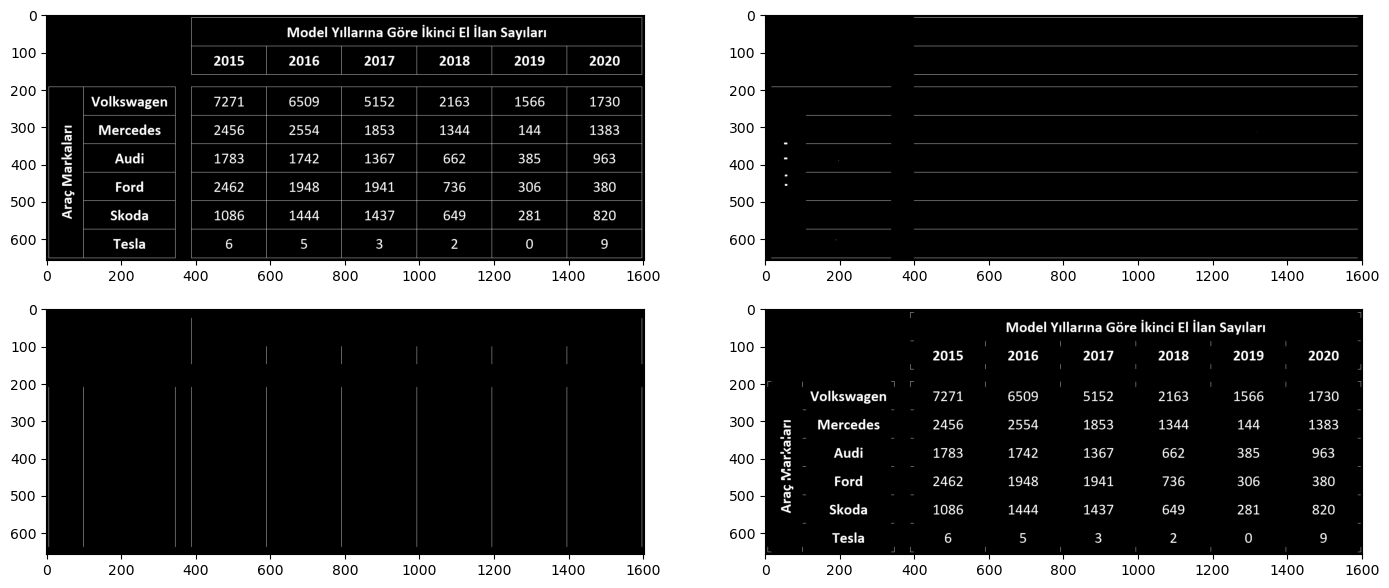

In [9]:
#MORFOLOJİK İŞLEMLERDEKİ AŞINDIRMA İŞLEMİ İLE KENAR TESPİTİ:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

img = cv2.imread('OneDrive/Belgeler/OpenCV/Kitap/DATA/16_table.png',0)
img = cv2.bitwise_not(img)

horizotonalKernel = np.ones(shape=(1,20))
horizotonalErosion = cv2.erode(img,horizotonalKernel,iterations=1)

verticalKernel = np.ones(shape=(30,1))
verticalErosion = cv2.erode(img,verticalKernel,iterations=1)

result = img - horizotonalErosion - verticalErosion

f,eksen = plt.subplots(2,2,figsize=(17,7))
eksen[0,0].imshow(img,cmap="gray")
eksen[0,1].imshow(horizotonalErosion,cmap="gray")
eksen[1,0].imshow(verticalErosion,cmap="gray")
eksen[1,1].imshow(result,cmap="gray")

**Erosion işleminin çalışması için arka planın siyah ön planın ise beyaz olması gerektiği için orijinal resmimizi bitwise_not operatörü ile dengeledik. Ardından Erosion operatörü ile kenarlar harici alanları aşındırarak,sadece kenarların dışarıya alınması mümkündür. Normalde kenar tespiti için zaman olarak uzun güncellik olarak ilkel bir yaklaşım sunmak sadece algoritma mantığını anlamak için gerekli olabilmektedir.**

**2-KÖŞE TESPİT ALGORİTMALARI**

**Bir köşe noktası tüm yönlerde yoğunluk değişiminin olduğu piksellerdir.**

**Kenar tespitinde yatayda ve dikeyde yan yana veya üst üste yoğunluk değişiminin olduğu pikseller aranırken burada ise benzer şekilde ancak tüm yönlerde yoğunluk değişiminin olduğu pikseller aranmaktadır.**

**Teknik bir tanımla,her bir pikselin komşu olduğu pikseller incelenecek ve aralarında anlamlı bir değişiklik varsa bu piksel için bir köşedir tespiti yapılacaktır.**

**HARRİS KÖŞE TESPİT ALGORİTMASI**

Tüm yönlerde köşe puanlarının diferansiyelini kullanarak kaydırma işlemi yapılmaktadır.

1. Gri Kodlamaya Çevirme
2. Gradyan Hesaplama(sobel)
3. Köşe Değeri Hesaplama:Elde edilen değere göre ilgili pikselin köşe olup olmadığına karar verilmesidir.
   EGER R < 0 ise yoğunluk değişimi sadece yatay yöndedir,köşe pikseli değildir.
   EGER R > 0 ise her yönde ani yoğunluk değişimi mevcuttur.(x,y) köşe pikselidir.
4. Maksimum Olmayan Bastırma: Tarama alanındaki pikselleri incelenerek en iyi köşe ihtimalin olduğu pikseli ortaya çıkartmaktır.
5. Köşe Seçimi: Bulunan bütün köşeler, köşe değerlerine göre sıralandıktan sonra kullanıcının istediği köşe sayısı kadar köşenin döndürülmesidir.

In [ ]:
import cv2
corners = cv2.cornerHarris(src,blockSize,ksize,k[,dst[,borderType]])
# k:0.04 - 0.06 arasında seçilmektedir.k parametresi HASSASİYET AYARI olduğu unutulmamalı

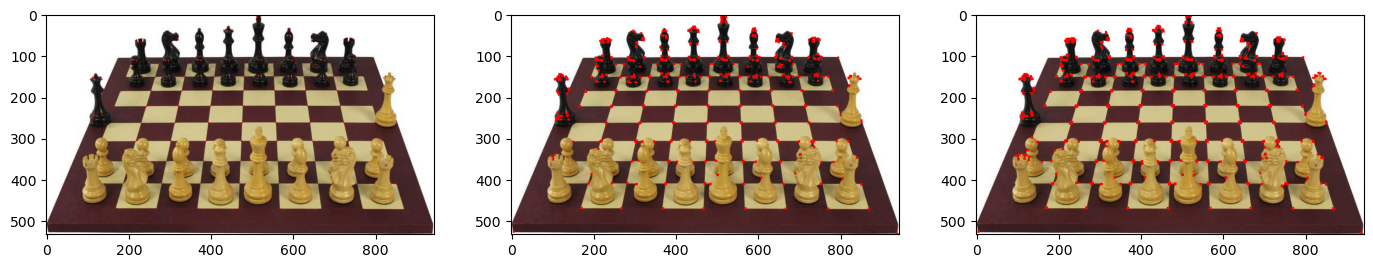

In [12]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

imgA = cv2.imread('OneDrive/Belgeler/OpenCV/Kitap/DATA/22_real_chess.jpg')
imgA = cv2.cvtColor(imgA,cv2.COLOR_BGR2RGB)
imgGray = cv2.cvtColor(imgA,cv2.COLOR_RGB2GRAY)

imgB = imgA.copy()
imgC = imgA.copy()

corners = cv2.cornerHarris(imgGray,blockSize=2,ksize=3,k=0.04)
corners3 = cv2.cornerHarris(imgGray,blockSize=3,ksize=5,k=0.06)

corners2 = cv2.dilate(corners,None,iterations=2)
corners3 = cv2.dilate(corners3,None,iterations=2)

imgA[corners>0.01*corners.max()] = [255,0,0]
imgB[corners2>0.01*corners2.max()] = [255,0,0]
imgC[corners3>0.01*corners3.max()] = [255,0,0]

f,eksen = plt.subplots(1,3,figsize=(17,7))
eksen[0].imshow(imgA)
eksen[1].imshow(imgB)
eksen[2].imshow(imgC)

**K parametresinin etkisinin iyi anlaşılması için farklı k değerleri kullanılarak elde edilen yeni sonuçların karşılaştırılması k parametresinin öneminin ve kullanımının anlaşılmasında oldukça faydalı olacaktır.**

**KAMERA KALİBRASYONU İÇİN KÖŞE TESPİTİ**

Görüntü eğiminden kaynaklı gürültüleri gidermede veya 3D yapılandırma işlemlerinde kullanılmaktadır.

Bir kamera kendisine gelen ışın açılarına göre bir renk ve yoğunluk ölçümü yapılarak görüntü piksellerini oluşturur.Bu ışınların eğimli olması gürültülere veya görüntü üzerinde istenmeyen bozukluklara sebep olabilir.Bunu gidermek için kameralar kalibre edilmektedir.

**findChessboardCorners()** -- **findcirclegrid()** --**drawChessboardCorners()**

In [ ]:
import cv2
retval = cv2.findChessboardCorners(image,patternSize[,corners[,flags]])
retval1 = cv2.findCirclesGrid(image,patternSize,flags,blobDetector,parameters[,centers])
retval2 = cv2.drawChessboardCorners(image,patternSize,corners,patternWasFound)

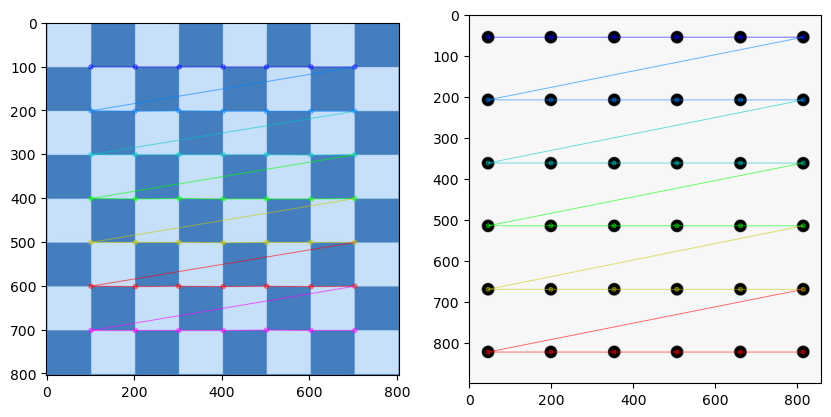

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

imgChess = cv2.imread('OneDrive/Belgeler/OpenCV/Kitap/DATA/23_chess_board.jpg')
imgCircles = cv2.imread('OneDrive/Belgeler/OpenCV/Kitap/DATA/24_grid_dots.png')

retval,corners = cv2.findChessboardCorners(imgChess,(7,7))
retval2,corners2 = cv2.findCirclesGrid(imgCircles,(6,6))

cv2.drawChessboardCorners(imgChess,(7,7),corners,retval)
cv2.drawChessboardCorners(imgCircles,(6,6),corners2,retval2)

f,eksen = plt.subplots(1,2,figsize=(10,5))
eksen[0].imshow(imgChess)
eksen[1].imshow(imgCircles)

**3-DİĞER ALGORİTMALAR**

**ÇEVRİT(KONTUR)TESPİT ALGORİTMALARI**

Bir resim üzerinde bulunan aynı renk ve yoğunluğu sahip sınır piksellerin(kenar piksellerinin) bir eğri olarak birleştirilmesidir.Kontur algılamadaki amacımız geliştireceğimiz modelimizin bize bu resimdeki 3 nesnenin sınırlarını belirlemesidir.

**findContours()** fonksiyonu ile çalışmaktadır, images parametresi ise gri seviyeli görünüm şeklinde olmalıdır.Ön plan resimlerinin beyaz renk, arka plan resimlerinin ise siyah renk olması gereklidir.Bu fonksiyon her bir nesne için o nesneye ait sınır piksellerinin koordinatlarını bir ndarray nesnesi olarak geriye döndürür. Elde edilen bu koordinat listesini kullanarak sınırları çizmek için **drawContours()** kullanılır.

OpenCV'de kontur tespiti için CHAIN_APPROX_NONE, CHAIN_APPROX_SIMPLE adında iki yöntem bulunur.Aralarındaki fark tespit edilen kenar piksellerinin nasıl ifade edileceğidir. 
Mesela 200X200 piksel değerinde resim olduğunu varsayalım CHAIN_APPROX_NONE yöntemiyle 800 kez her birini kenar piksellerini dağıtacaktır.CHAIN_APPROX_SIMPLE ise bu işlemi sınır piksellerini 4 birleştirecektir. Tabi ki bu doğrusal geometrik cisimlerde uygulanılması avantajlıdır.

**!Gerçek resimlerde çalışırken konturların daha iyi tespit edilebilmesi için bir yumuşatma işlemi uygulanması neredeyse bir gerekliliktir.Yumuşatma işleminde kernel yapısı resmin boyutuna göre arttırılması gerekliliği unutulmamalı.Her skimage dikkat et.

In [ ]:
import cv2
contours1 = cv2.findContours(image,mode,method,[,contours[,hierarchy[,offset]]])
contours2 = cv2.drawContours(image,contours,contourIdx,color[, thickness[,lineType[,hierarch[,maxLevel[,offset]]]]])

[[[ 7 -1  1 -1]
  [ 2 -1 -1  0]
  [ 3  1 -1  0]
  [ 4  2 -1  0]
  [ 5  3 -1  0]
  [ 6  4 -1  0]
  [-1  5 -1  0]
  [ 9  0  8 -1]
  [-1 -1 -1  7]
  [-1  7 10 -1]
  [11 -1 -1  9]
  [12 10 -1  9]
  [-1 11 -1  9]]]


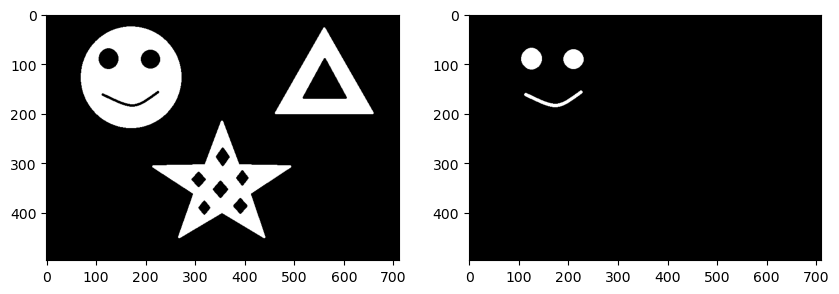

In [17]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

img = cv2.imread('OneDrive/Belgeler/OpenCV/Kitap/DATA/25_contour.jpg',0)
retval,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

contours,hierarchy = cv2.findContours(img,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy) #findContours() ile üretilen konturlar arasındaki bağlantıyı gösteren vektörel

emptyImg = np.zeros(img.shape)
for i in range(len(contours)):
    if hierarchy[0][i][3] == 9:
        cv2.drawContours(emptyImg,contours,i,255,-1)
        
f,eksen = plt.subplots(1,2,figsize=(10,5))
eksen[0].imshow(img,cmap='gray')
eksen[1].imshow(emptyImg,cmap='gray')


**WATERSHED ALGORİTMASI**

Seviyelerine göre görüntü üzerinde bulunan bütün nesnelerin birbirinden ayrılması sağlayabilir.Resim ilk önce gri seviyeli dönüşüme çevrilir.

Gri tonlamalı bir görüntünün topolojik haritası çıkarıldığında yüksek yoğunluğun(ön plan) olduğu bölgeler tepe noktası, düşük yoğunluğunun(arka plan) olduğu bölgeler vadiler gibi düşünülüp işaretlenmesi.Bu işaretlenme **MARKERS** matrisini oluşturur.

OpenCV'de bölütleme işlemi için sadece 2 parametre alarak çalışan **watershed()** fonksiyonu kullanılmaktadır.Ancak fonksiyon çağrılmadan önce **markers** matrisi oluşturulmalıdır.Tek kanallı ve sadece işaretlenmelerin etiketlerin olacağı bu matrisin boyutu giriş resminin boyutu ile aynıdır.

In [ ]:
import cv2

dist_transform = cv2.distanceTransform(src,distanceType,maskSize,[,dst[,dstType]]) #Ön plan resimlerinin nesne sınırından merkeze doğru ilerlemesi
ret,markers = cv2.connectedComponents(image[,labels[,connectivity[,ltype]]]) #Ön plan resimlerinin birbirine değme durumu veya üst üste gelme durumu
markers = cv2.watershed(image,markers) #image:bölütlerin hesaplanacağı 8-bitlik 3 kanallı resim,markers:32 bitlik tek kanallı etiket haritası(giriş resmi ile aynı boyutta)

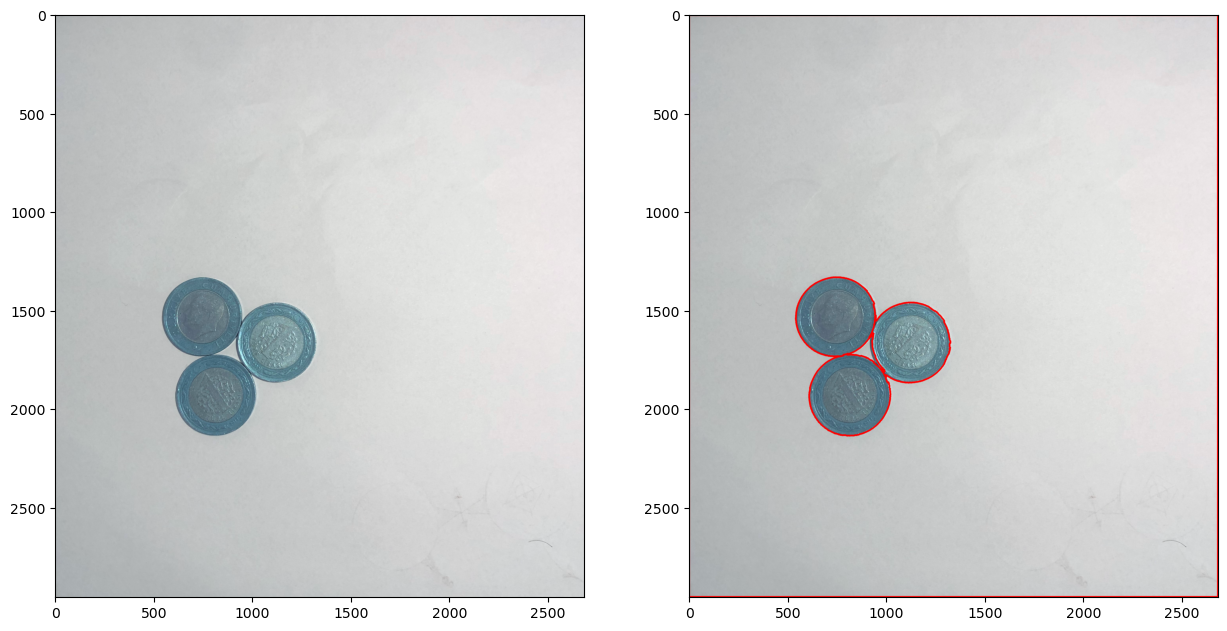

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

imgOrj = cv2.imread('OneDrive/Belgeler/OpenCV/Kitap/DATA/26_coins.jpg')
imgBLR = cv2.medianBlur(imgOrj,31)
imgGray = cv2.cvtColor(imgBLR,cv2.COLOR_BGR2GRAY)

ret,imgTH = cv2.threshold(imgGray,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((5,5),np.uint8)
imgOPN = cv2.morphologyEx(imgTH,cv2.MORPH_OPEN,kernel,iterations=7)

#Arka Plan Alanı
sureBG = cv2.dilate(imgOPN,kernel,iterations=3)

#Ön Plan Alanı
dist_transform = cv2.distanceTransform(imgOPN,cv2.DIST_L2,5)
ret,sureFG = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

#Bilinmeyen Alan
sureFG = np.uint8(sureFG)
unKnownArea = cv2.subtract(sureBG,sureFG)

ret,markers = cv2.connectedComponents(sureFG,labels=5)
markers = markers + 1
markers[unKnownArea == 255] = 0

markers = cv2.watershed(imgOrj,markers)
imageCNR = markers
contours,hierarchy = cv2.findContours(markers,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

imgCopy = imgOrj.copy()

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(imgCopy,contours,i,(255,0,0),5)
        
f,eksen = plt.subplots(1,2,figsize=(15,15))
eksen[0].imshow(imgOrj)
eksen[1].imshow(imgCopy)


**Aynı kodları farklı farklı değerlerle çalıştırmak fonksiyon parametrelerinin daha iyi anlaşılmasını sağlayacaktır.Ayrıca blurring işlemi yapmadan çalıştırmak, bu adımın gerekliliğini ve hangi işlemlerden önce blurring yapılması gerekliliği daha iyi anlamınıza yardımcı olacaktır.**

Text(70, 155, 'imageCNR')

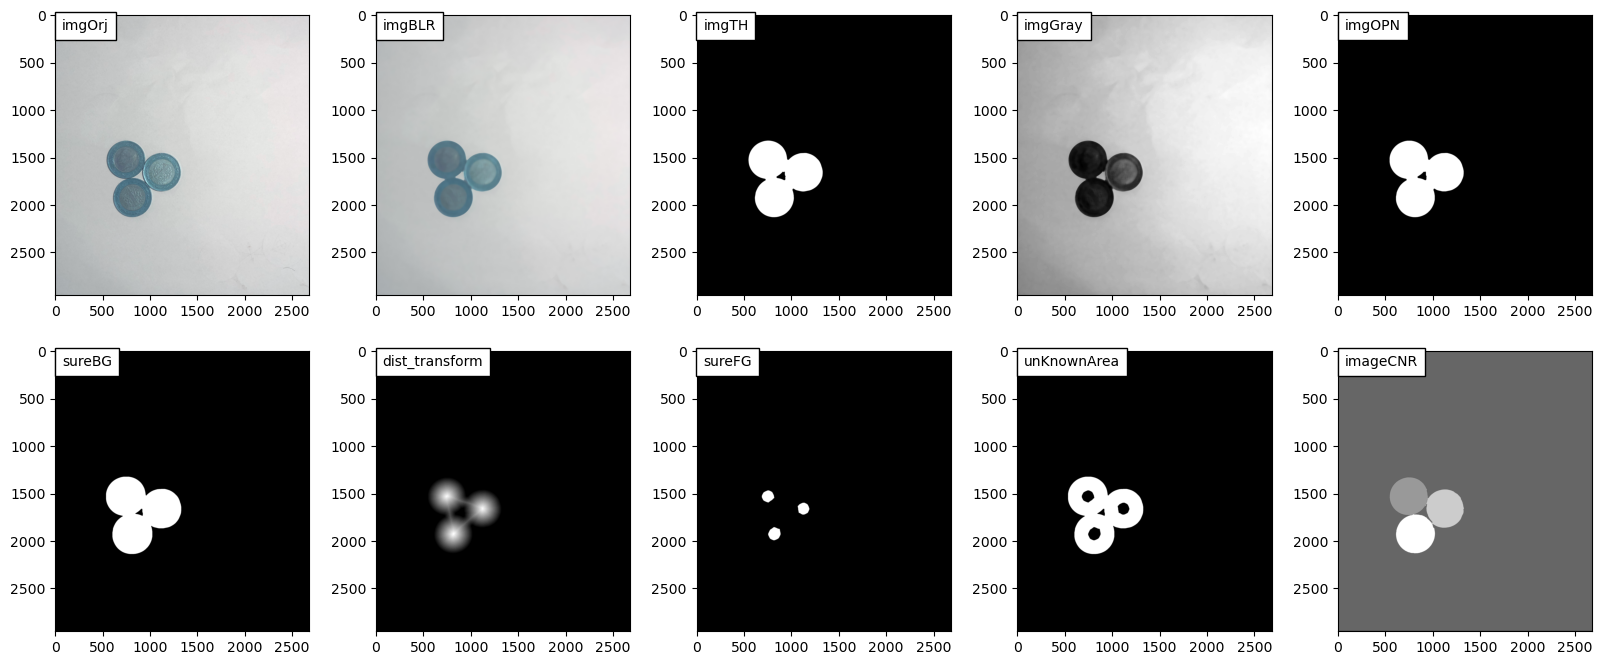

In [4]:
x = 70
y = 155

f,eksen = plt.subplots(2,5,figsize=(20,8))

eksen[0,0].imshow(imgOrj,cmap='gray')
eksen[0,0].text(x,y,'imgOrj',bbox={'facecolor':'white','pad':5})

eksen[0,1].imshow(imgBLR,cmap='gray')
eksen[0,1].text(x, y, 'imgBLR', bbox={'facecolor': 'white', 'pad': 5})

eksen[0,2].imshow(imgTH,cmap='gray')
eksen[0,2].text(x, y, 'imgTH', bbox={'facecolor': 'white', 'pad': 5})

eksen[0,3].imshow(imgGray,cmap='gray')
eksen[0,3].text(x, y, 'imgGray', bbox={'facecolor': 'white', 'pad': 5})

eksen[0,4].imshow(imgOPN,cmap='gray')
eksen[0,4].text(x, y, 'imgOPN', bbox={'facecolor': 'white', 'pad': 5})

eksen[1,0].imshow(sureBG,cmap='gray')
eksen[1,0].text(x, y, 'sureBG', bbox={'facecolor': 'white', 'pad': 5})

eksen[1,1].imshow(dist_transform,cmap='gray')
eksen[1,1].text(x, y, 'dist_transform', bbox={'facecolor': 'white', 'pad': 5})

eksen[1,2].imshow(sureFG,cmap='gray')
eksen[1,2].text(x, y, 'sureFG', bbox={'facecolor': 'white', 'pad': 5})

eksen[1,3].imshow(unKnownArea,cmap='gray')
eksen[1,3].text(x, y, 'unKnownArea', bbox={'facecolor': 'white', 'pad': 5})

eksen[1,4].imshow(imageCNR,cmap='gray')
eksen[1,4].text(x, y, 'imageCNR', bbox={'facecolor': 'white', 'pad': 5})

**ŞABLON EŞLEŞTİRME**

Aranan bir resim parçasının, giriş resmi üzerinde tek tek taranması ile sonuca ulaşır.

Eğer birden fazla aranan parça varsa hepsini bulacaktır.Tek tek taranmadan kasıt,aranan parça resmin giriş resminin ilk pikselinden itibaren piksel piksel kaydırılarak taranmasıdır.

Eğer giriş resmi ile aranan resim arasında görüş açısı farklılığı,ışık farklılığı,filtreleme farklılığı,pozlama farklılığı,ölçekleme farklılığı veya benzeri bir durum var ise herhangi bir sonuç elde edilmesi neredeyse imkansızdır.

**matchTemplate()** ile R değerini hesaplayabiliriz. Bu fonksiyon bize tüm resim alanında hesaplanmış karşılaştırma sonuçlarını verecektir. Eğer bu karşılaştırma sonuçları arasından en iyi sonucun elde edilmesi isteniliyorsa, bunun için **minMaxLoc()** fonksiyonlarını bulmak için kullanılmaktadır.

Kullanılan Template Matching yöntemine göre R değerlerinin farklı değerlendirilmesi gerektiği unutulmamalıdır.Mesela,Square Differance metotları en iyi eşleşmeyi minimum değerler ile gösterirken Correlation ve Correlation Coefficient metotları ise maksimum değerler ile gösterir.



In [ ]:
import cv2
resultMap = cv2.matchtemplate(image,templ,method[,result[,mask]])
maxLoc = cv2.minMaxLoc(src[,mask])

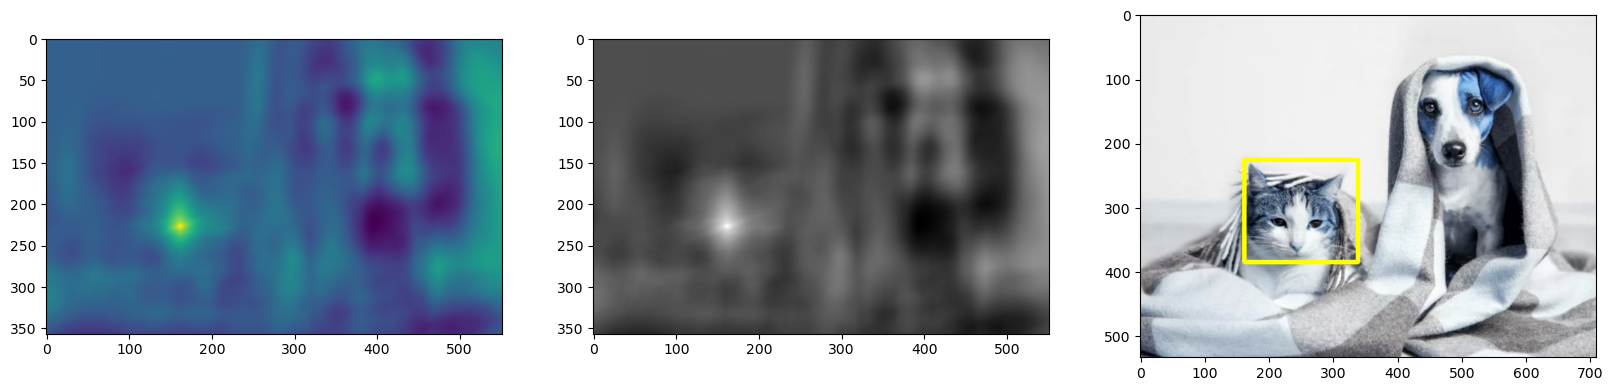

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

searchIMG = cv2.imread('OneDrive/Belgeler/OpenCV/Kitap/DATA/28_animalsPiece.jpg')
targetIMG = cv2.imread('OneDrive/Belgeler/OpenCV/Kitap/DATA/27_animals.jpg')

resultMap = cv2.matchTemplate(targetIMG,searchIMG,cv2.TM_CCOEFF) #ortalamaya göre eşleştirme
minVal,maxVal,minLoc,maxLoc = cv2.minMaxLoc(resultMap)

w,h,c = searchIMG.shape

startLoc = maxLoc
stopLoc = (startLoc[0] + w, startLoc[1] + h)

cv2.rectangle(targetIMG,startLoc,stopLoc,(255,255,0),5)

f,eksen = plt.subplots(1,3,figsize=(20,5))
eksen[0].imshow(resultMap) #yüksek piksel yoğunluğu bulunmaktadır.
eksen[1].imshow(resultMap,cmap='gray')
eksen[2].imshow(targetIMG)

**Eğer Template Matching ile taranan resim üzerinde ilgili nesnemizden veya şablonumuzdan birden fazla mevcut ise minMaxLoc() fonksiyonunun bütün konumlarını geriye döndürmesi mümkün değildir. Elde edilen karşılaştırma sonucu tek kanallı bir resim olduğu için hesaplama matrisi üzerinde bir threshold(eşikleme) yapılarak eşleştirmenin olduğu her bölge ortaya çıkarılabilir ve bu sayede istenildiği gibi işlenmesi mümkün olacaktır.**

**ÖZNİTELİK ÇIKARMA VE EŞLEŞTİRME**

Çalışma mantığı,resimlerin özellik tanımlamalarını çıkarıp karşılaştırma işlemi yapılmaktadır.
Aranan ve hedef resimleri arası tam uyum olması şartı bulunmamaktadır.İstenilen benzerlik oranına göre sonuç çıkarılabilir.

OpenCV'de Öznitelik Eşleştirme Adımları:

1. Algılayıcının kurulması ve Öznitelik/Tanımlamaların Çıkarılması: KeyPoints & Descriptors (Anahtar Noktalar & Tanımlayıcılar)
2. Karşılaştırılma Yapılması: Matcher nesnesi oluşturma
3. Benzerliklerin Seçimi ve Gösterimi: Filtreleme ve işaretleme

Bir görüntüden çıkarılacak bir özniteliğin gürültülere karşı dayanıklı olması, ölçeklendirmelerden veya bakış açılarından çok etkilenmemesi ve en önemlisi de ayırt edici olması beklenir.

**Öznitelik Çıkarma Algoritmaları:**
1. **SIFT**:Ölçek Değişmez Özellik Dönüşümü, nesne tanımada çok en başarılı fakat çalışma zamanında verimsiz. 
   
   Piramit Tekniği ->Anahtar Noktalarını Belirleme ->Belirlenen her bir anahtar noktalarını yerel görüntü tanımlayıcılarının çıkarılması. 
   
2. **SURF**:Hızlandırılmış Güçlü Özellik:Resmin integrali üzerine bir kernel yapısı çalıştırılarak sonuca varılır.

3. **FAST**:Hızlandırılmış Segment Testi ile Özellik:Taradığı alanda sadece belirli bazı piksellere bakarak köşe noktası olup olmadığını karar vermesinden kaynaklanmaktadır.Verimliliği olumsuz etkiler.

4. **ORB**:Yönlendirilmiş FAST ve Döndürülmüş BRIEF:Hızlıdır ve başarılıdır. Yoğunluk değişimlerine göre hassastır.

**SIFT_create()** - **ORB_create** -> opencv_contrib paketinde olduğu için bir alt pakette xfeatures2d.SIFT_create() & xfeatures2d.ORB_create()'dır.

**Öznitelik Karşılaştırma Algoritmaları:**

1. Brute Force Matcher(**BFMatcher()**):İki özellik kümesinin karşılaştırılmasında aranan özellik kümesindeki her bir elemanı ikinci özellik kümesi olan hedef özellik kümesinin her bir elemanıyla olan mesafesini hesaplar ve en küçük mesafeye sahip olam hedef özellik kümesi elemanını hesaplanan mesafesiyle birlikte geriye döndürür. 

In [ ]:
import cv2
orb = cv2.xfeatures2d.ORB_create(nfeatures=500,scaleFactor=1.2,nlevels=8,edgeThreshold=31,firstLevel=1,WTA_K=2,scoreType=HARRIS_SCORE,patchSize=31,fastThreshold=20)
sift = cv2.xfeatures2d.SIFT_create(nfeatures=0,nOctaveLayers=3,contrastThreshold=0.03,edgeThreshold=10,sigma=1.6)

Algılayıcı nesnelerin gereken parametrelerle oluşturulmasından sonra anahtar noktaların tespiti ve tanımlayıcıların hesaplanması için **detectAndCompute()** fonksiyonu kullanılmaktadır.

Bazı özel durumlarda **detect()** ve **compute()** fonksiyonlarını ayrı ayrı kullanılarak anahtar noktalarının tespitinin ve tanımlayıcıların hesaplanmasının ayrı ayrı yapılması mümkündür.

Birlikte çağrılması daha hızlı bir şekilde sonuç alınabileceğinin göstergesidir.

In [ ]:
import cv2
orb = cv2.xfeatures2d.ORB_create()
orb.detectAndCompute(image,mask,[descriptors[,useProvidedKeyPoints]])

In [ ]:
import cv2
bf = cv2.BFMatcher_create([,normType=NORM_L2[,crossCheck=False]])

**BFMatcher()** sınıfından bir nesne türetildikten sonra yine bu sınıfın metotları olan **match()** veya **knnMatch()** kullanılarak eşleştirme işlemi yapılabilmektedir.

match() fonksiyonu ile ilk parametre olarak sağlanan tanımlayıcı elemanları arasındaki en iyi eşleştirmeyi bulur en yakın mesafeli olanı geriye döndürür. knnMatch() fonksiyonu ise match() fonksiyonu ile aynı işlevde bulunur ek olarak k en yakın komşu parametresi alarak en iyi k adet eşleşmeyi bulur ve en yakın mesafeli olan k adet eşleşmeyi geriye döndürür.

In [ ]:
import cv2
bf = cv2.BFMatcher_create()
bf.match(queryDescriptors,trainDescriptors,[,mask=False])
bf.knnMatch(queryDescriptors,trainDescriptors,k[,mask[,compactResult]])

Elde edilen eşleşme sonuçlarını görüntü üzerinde göstermek için **drawKeypoints()** veya **drawMatches()** fonksiyonları kullanılabilir. Eğer bir tanımlama noktası için k adet en iyi sonuç elde edilmişse **drawMatchesKnn()** fonksiyonu kullanılabilir.

In [ ]:
import cv2
result = cv2.drawMatches(img1,keypoints1,img2,keypoints2,matches1to2,outImg[,matchColor[,singlePointColor[,matchesMask[,flags]]]])
result2 = cv2.drawMatchesKnn(img1,keypoints1,img2,keypoints2,matches1to2,outImg[,matchColor[,singlePointColor[,matchesMask[,flags]]]])

< cv2.DMatch 000002949C33CA70>
88.0


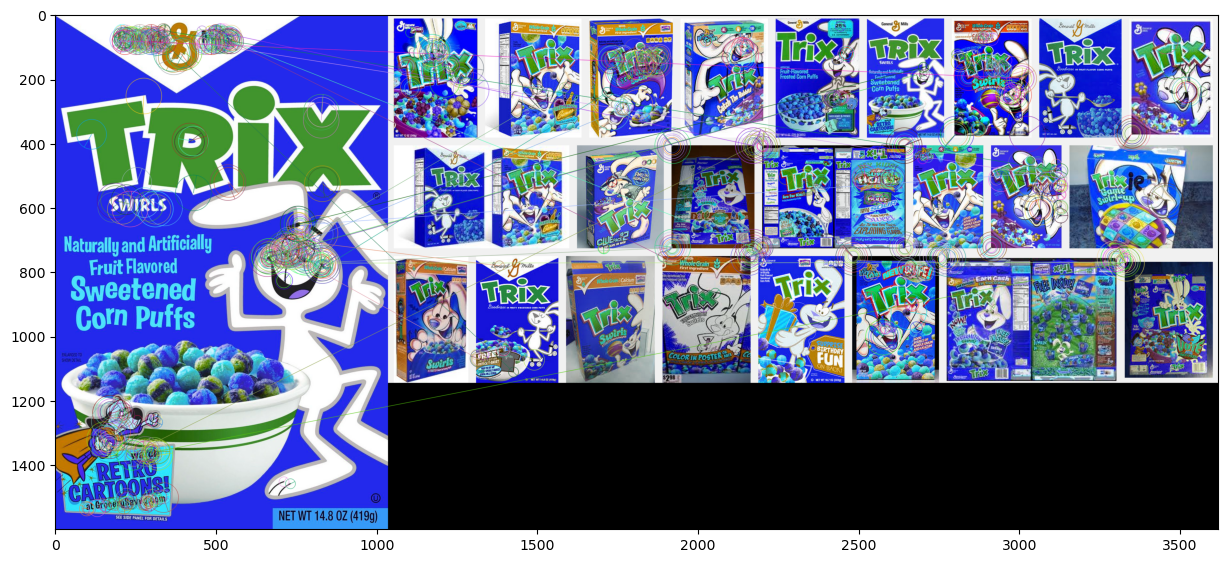

In [19]:
#ÖZNİTELİK EŞLEŞTİRME
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

searchIMG = cv2.imread('OneDrive/Belgeler/OpenCV/Kitap/DATA/30_trix.jpg')
targetIMG = cv2.imread('OneDrive/Belgeler/OpenCV/Kitap/DATA/29_trix_asile.png')

orb = cv2.ORB_create()
keypointsSearch,descriptorsSearch = orb.detectAndCompute(searchIMG,mask=None)
keypointsTarget,descriptorsTarget = orb.detectAndCompute(targetIMG,mask=None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING,True)
matches = bf.match(descriptorsSearch,descriptorsTarget)

print(matches[0])
print(matches[0].distance)
matches = sorted(matches,key=lambda x:x.distance)

result = cv2.drawMatches(searchIMG,keypointsSearch,targetIMG,keypointsTarget,matches[:20],outImg=None,flags=4)

f,eksen = plt.subplots(1,1,figsize=(15,15))
eksen.imshow(result)

(< cv2.DMatch 000002949C33CD50>, < cv2.DMatch 000002949BB3A810>)
318.7585144042969


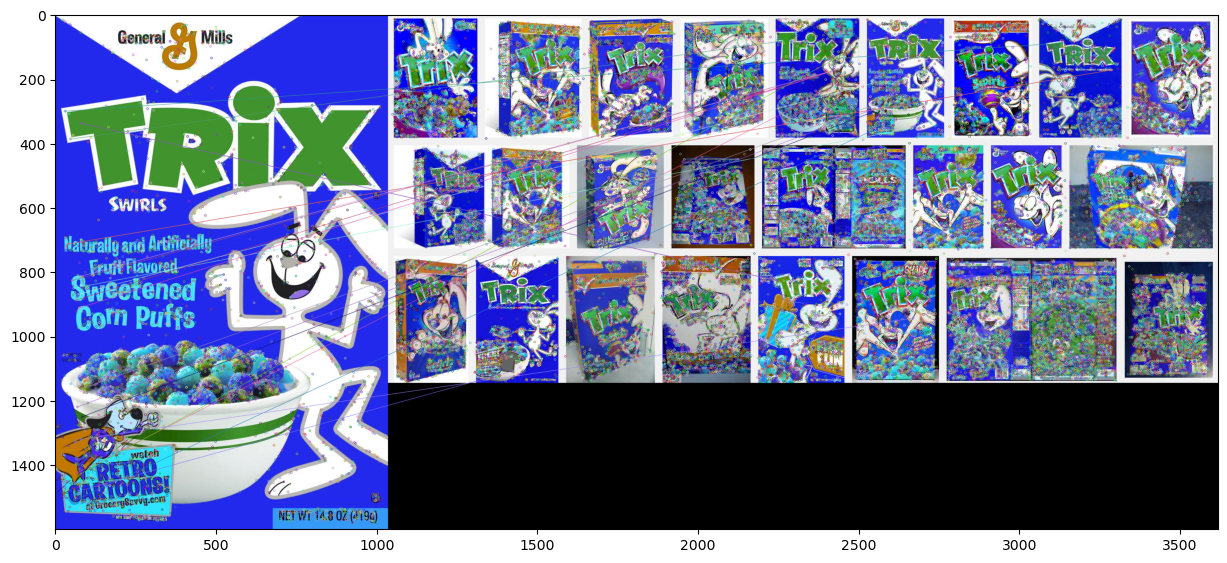

In [22]:
#ÖZNİTELİK EŞLEŞTİRME-2
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import cv2

searchIMG = cv2.imread('OneDrive/Belgeler/OpenCV/Kitap/DATA/30_trix.jpg')
targetIMG = cv2.imread('OneDrive/Belgeler/OpenCV/Kitap/DATA/29_trix_asile.png')

sift = cv2.xfeatures2d.SIFT_create()
keypointsSearch,descriptorsSearch = sift.detectAndCompute(searchIMG,mask=None)
keypointsTarget,descriptorsTarget = sift.detectAndCompute(targetIMG,mask=None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptorsSearch,descriptorsTarget,k=2)
print(matches[0])
print(matches[0][0].distance)

goodMatches = []

for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        goodMatches.append([match1])
        
result = cv2.drawMatchesKnn(searchIMG,keypointsSearch,targetIMG,keypointsTarget,goodMatches[:20],outImg=None,flags=0)

f,eksen = plt.subplots(1,1,figsize=(15,15))
eksen.imshow(result)

**HAAR CASCADE SINIFLANDIRICI ALGORİTMASI**

Görüntü üzerinde bulunan yüzlerin tespiti için geliştirildi ancak bir çok nesnenin algılanması için kullanılabilmektedir.Haar-Benzeri özelliklerin taranmasını oldukça hızlı gerçekleştiren bir makina öğrenme algoritmasıdır.Haar, sinyal/görüntü dönüşüm/sıkıştırma işlemlerinde kullanılan **kare biçimli** fonksiyonlar dizisidir. Çalışma mantığında ise görüntünün olduğu gibi aranması yerine dijital özelliklerinin aranmasıdır.

HAAR CASCADE CLASSİFER ADIMLARI:

1. Haar Özelliklerinin Seçilmesi:İnsan yüzünün bazı ortak özelliklerinden çıkarım yapılabilir.Çok boyutlu düşünmek.Haar çerçevesinde beyaz/siyah alanlara dek gelen piksel değerlerinin toplanıp birbirinden çıkarılmasıdır.Bu sayede algoritma elde edilen sonuca göre ilgili çerçeveye denk gelen bir alanın HAAR özelliği olup/olmadığına karar verir.

2. Resim İntegralinin Hesaplanılması:Haar hesaplamaların piksel piksel kaydırarak taranması ve analiz edilmesi işlemciye yük bindirir.Overflow!       Bir resmin integralini hesaplamak için resmin (0,0) konumlu numaralı pikselinden başlayarak her satır ve her sütun piksel değerleri toplanarak ilerlenir bu sebeple resmin integrali **Toplam Alan** olarakta geçmektedir. Ancak resim integrali hesaplanması görüntü parlaklığına karşı oldukça hassas olduğu ve 45 derece eğimlerle çevrilmiş Haar özelliklerinde başarımın oldukça düşeceği unutulmamalıdır.Ayrıca üst üste binebilecek Haar özelliği eşleşmelerinden dolayı bir yüzün birden fazla kez tespit edilmesinin de mümkün olacağı unutulmamalıdır.

3. AdaBoost ile Model Eğitme:Taranacak Haar özelliğini azaltma amacındadır.İstatistiksel bir sınıflandırma algoritmasıdır.AdaBoost optimizasyon modeli ile zayıf Haar özelliklerini birleştirerek Haar sayısının tekrarlarını azaltacaktır.

4. Cascading Sınıflandırması: Sınıflandırma yani ayırt edici özellik performanslarını eleme yaparak maliyeti daha düşüreceğiz.Düşük sayıda FP - yüksek sayıda TP sonuçlar elde etmek için daha karmaşık sınıflandırma algoritmalarından önce karar ağacına benzeyen bir sınıflandırma algoritması.            
Çalışma mantığı; eğer bir tarama ilk adımı geçemiyorsa direkt elenir ancak tüm adımları geçebiliyorsa bu tarama sonucu bir yüz olarak işaretlenip kullanıcıya geri dönüş sağlanır.Dikkat edilmesi;yanlış pozitif oranın düşmesi ile doğru pozitif kaybının oluşması arasındaki dengenin iyi sağlanmasıdır.

OpenCV'de ilk aşama **CascadeClassifier()** fonksiyonu ile kullanılacak olan sınıflandırıcı yüklenir.İkinci aşamada ise **detectMultiScale()**,**detectMultiScale2()**,**detectMultiScale3()** fonksiyonları yüklenerek sınıflandırıcı ile tespitler gerçekleştirilir.

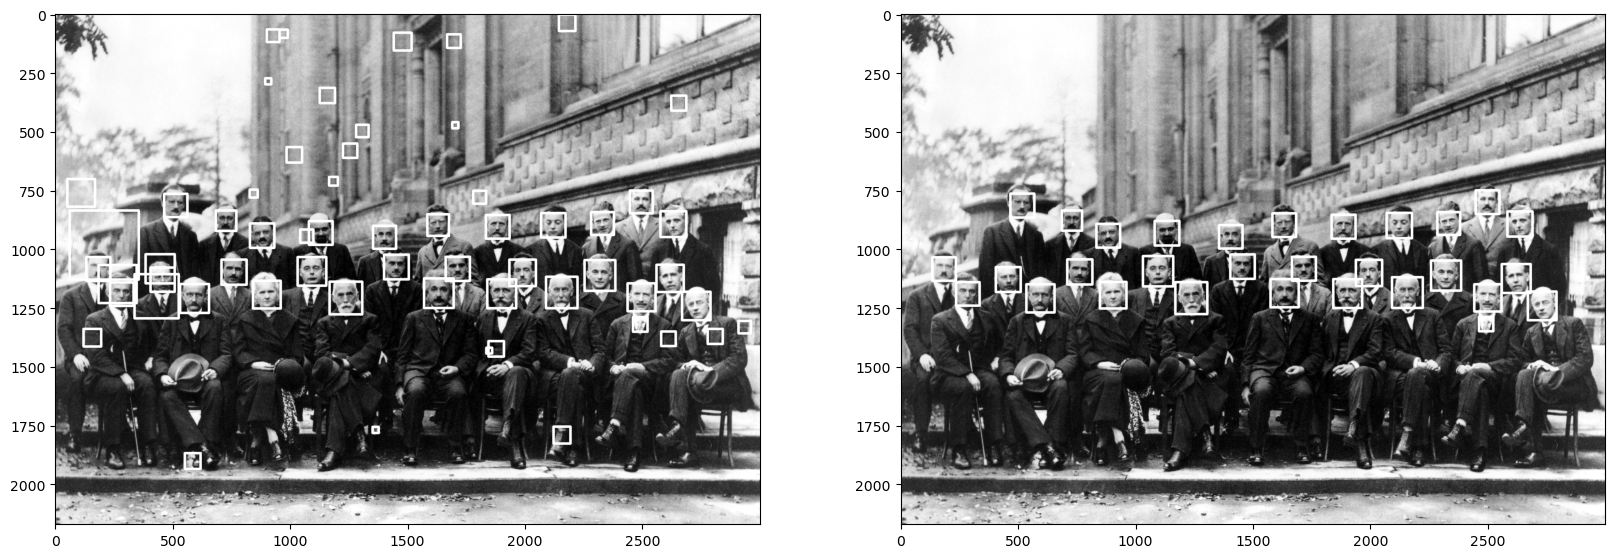

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

faceCascade = cv2.CascadeClassifier('OneDrive/Belgeler/OpenCV/Kitap/DATA/haarcascades/haarcascade_frontalface_default.xml')

conference_1 = cv2.imread('OneDrive/Belgeler/OpenCV/Kitap/DATA/32_solvayConference.jpg',0)
conference_2 = conference_1.copy()

faces_1 = faceCascade.detectMultiScale(conference_1)
for(x,y,w,h) in faces_1:
    cv2.rectangle(conference_1,(x,y),(x+w,y+h),(255,0,0),10)
    
faces_2 = faceCascade.detectMultiScale(conference_2,scaleFactor=1.3,minNeighbors=6)
for(x,y,w,h) in faces_2:
    cv2.rectangle(conference_2,(x,y),(x+w,y+h),(255,0,0),10)
    
f,eksen = plt.subplots(1,2,figsize=(20,10))
eksen[0].imshow(conference_1,cmap="gray")
eksen[1].imshow(conference_2,cmap="gray")

**FARKLI GÖRÜNTÜLER ÜZERİNDE FARKLI DEĞERDE PARAMETRELERLE ÇALIŞILMASI PARAMETRE DEĞERLERİNİN ETKİLERİNİN DAHA İYİ ANLAŞILMASINI SAĞLAYACAKTIR.**

Göz çevresinin ve yüz bölgesinin bulundukları alanlara göre yoğunluk farklılıklarının yüksek olması sağlanmalıdır çünkü bu algoritmanın çalışma mantığında siyah/beyaz bölgelerin taranması yatmaktadır.Asıl amaç göz çevresinin ve yüz çehresinin belirgin olması. Mesela aşağıda vereceğimiz örnekte yüz burun kısmı asimetrik değil ne yapabiliriz?

1. Uygun bir threshold metodu ve değeri seçilerek göz bölgesinin beyazlığının artması veya yüzün daha parlak olması sağlanılabilir. 
2. Farklı renk filtrelemelerini seçerek zayıf olan yüz bölgesinin veya göz bölgesinin ortaya çıkması sağlanılabilir.
3. Genişletme morfolojik özelliği dilate() fonksiyonu ile göz çehresi genişletilebilir.

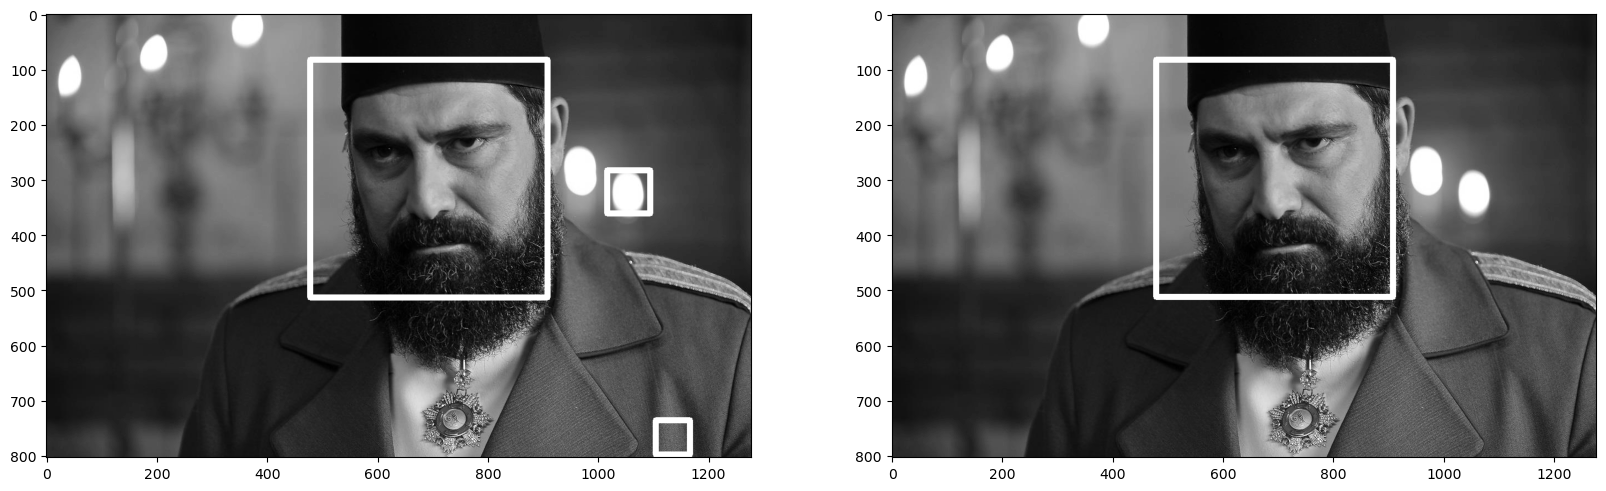

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

faceCascade = cv2.CascadeClassifier('OneDrive/Belgeler/OpenCV/Kitap/DATA/haarcascades/haarcascade_frontalface_default.xml')

conference_1 = cv2.imread('OneDrive/Belgeler/OpenCV/Kitap/DATA/33_payitaht.jpg',0)
conference_2 = conference_1.copy()

faces_1 = faceCascade.detectMultiScale(conference_1)
for(x,y,w,h) in faces_1:
    cv2.rectangle(conference_1,(x,y),(x+w,y+h),(255,0,0),10)
    
faces_2 = faceCascade.detectMultiScale(conference_2,scaleFactor=1.3,minNeighbors=6)
for(x,y,w,h) in faces_2:
    cv2.rectangle(conference_2,(x,y),(x+w,y+h),(255,0,0),10)
    
f,eksen = plt.subplots(1,2,figsize=(20,10))
eksen[0].imshow(conference_1,cmap="gray")
eksen[1].imshow(conference_2,cmap="gray")

HAARCASCADE MODELLERİNİN OLUŞTURULMA ADIMLARI:

1. Negatif resimlerin toplanması,yani içerisinde istediğimiz nesne olmayan resimlerin toplanılması.
2. Pozitif resimlerin toplanması,yani içerisinde istediğimiz nesne olanlar resimlerin toplanılması.
3. Modelin Eğitilmesi